In [511]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


import os
for root,dir,filenames in os.walk("."):  # os.walk istenen konumdaki " kök klasör adı(string) + klasör adlarını(list[str])) + dosya adlarını(list[str])" dönderir
    for filename in filenames :          # her bir dosya adını kök klasör adıyla beraber yazdırabiliriz 
        print(os.path.join(root,filename))
   
        
# Any results you write to the current directory are saved as output.


.\combats.csv
.\Introduction to Python.ipynb
.\pokemon.csv
.\tests.csv


In [512]:
data = pd.read_csv('pokemon.csv') # pd.read_csv komutu csv(Comma-separated values) dosyalarını okur 
data.head() #basitçe istenilen satır sayısı kadar veriyi gösterir default olarak 5 tir 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [513]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [514]:
# default olarak data.corr kodu ,person methoduna göre, özellikler arasındaki korelasyonu gösterir,değerler [1 ,-1] arasında olabilir 
# Pearson Correlation iki değişkeneninde normally distributed olduğunu kabul eder ve bunların arasındaki lineer ilişkileri gösterir lineer olmayan ilişkilerde yanılır
  # genelde sıralamanın önemli olduğu ikililerde tercih edilmez 
# Spearman’s Rank Correlation verilerin dağıtımı hakkında bir ön varsayımı yoktur lineer ve lineer olmayan ilişkileri yakalayabilir , genelde devamlı veya sıralı olan veriler  
  # arasındaki ilişkileri yakalamada tercih edilir 
# Korelasyonlar düşük ihtimalle olsada nedensel ilişkilerin bulunmasını sağlayabilir
# 1 total positive , -1 total negative ,0 no correlation
# 0.9 - 1 very highly correlated 
# 0.7 - 0.9 highly correlated
# 0.5 - 0.7 moderately correlated
# 0.3 - 0.5 low correlation

pearson=data.corr("pearson")
spearman=data.corr("spearman")
kendall=data.corr("kendall")

print("\n PEARSON \n",pearson)
print("\n SPEARMAN \n",spearman)
print("\n KENDALL \n",kendall)

# bu veri seti için benzer sonuçlar veriyolar gibi
print("\n PEARNSON-SPEARMAN \n",pearson-spearman) 
print("\n PEARSON-KENDALL \n",pearson-kendall)
print("\n SPEARMAN-KENDALL \n",spearman-kendall)



 PEARSON 
                    #        HP    Attack   Defense   Sp. Atk   Sp. Def  \
#           1.000000  0.097712  0.102664  0.094691  0.089199  0.085596   
HP          0.097712  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.102664  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.094691  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.089199  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.085596  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.012181  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.983428  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.154336  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  Generation  Legendary  
#           0.012181    0.983428   0.154336  
HP          0.175952    0.058683   0.273620  
Attack      0.381240    0.051451   0.345408  
Defense     0.015227    0.042419   0.246377  
Sp. Atk     0.473

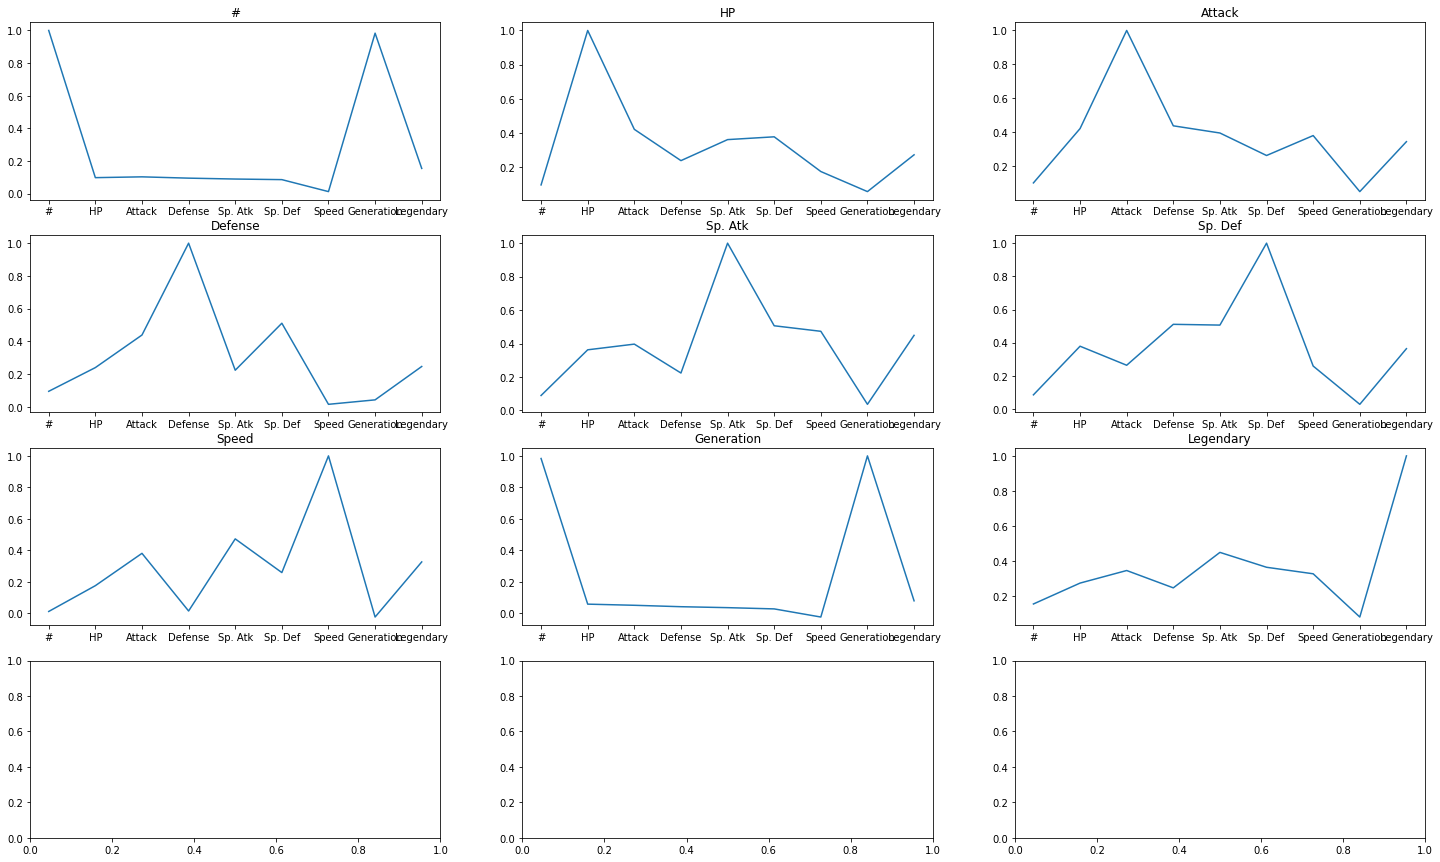

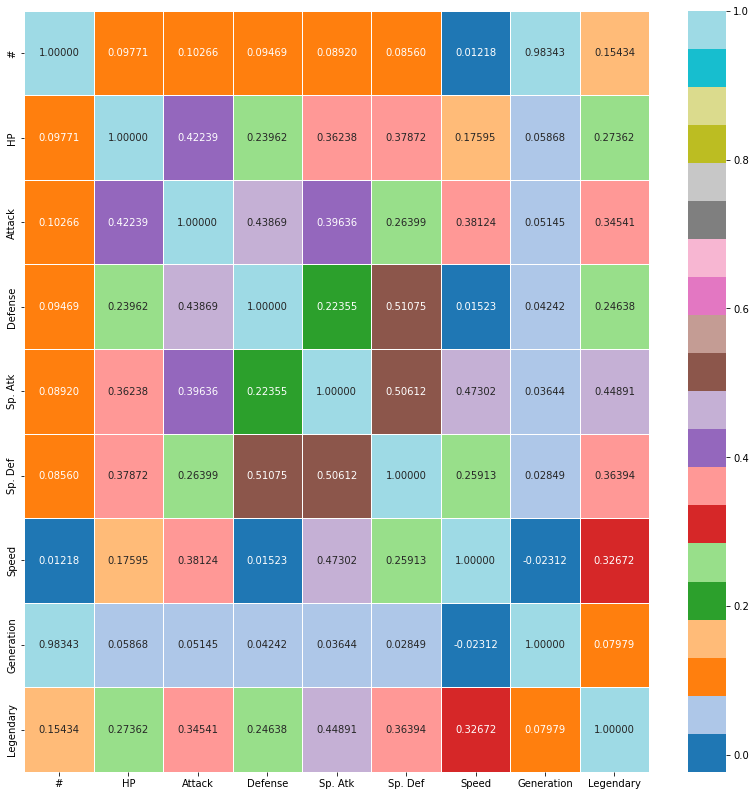

In [515]:
import math 
#correlation map

# özelliklerin birbileri ile olan ilişkilerini teker teker grafik şeklinde de çizdirebiliriz 
size=data.corr().columns.size  # özellik miktarını aldık 
y=math.sqrt(size/1.6)    # x.y=9 , x/y= 1.6(dikdörtgen) olacak şekilde kaç satır ve kaç stun kullanmamız gerektiğini buluyoruz 
x=y*1.6
y=math.ceil(y)
x=math.ceil(x)

f,ax = plt.subplots(x,y,figsize=(25, 15)) # subplots 2 değer dönderir ilki figur bilgisi 2.olarak ise ise cizim elamanlamanını dönderir

for i in range(0,x):  # sırasıyla özelliğin diğer özelliklerle ilişkisini çizdirip isimlendiriyoruz 
    for j in range(y):
        if(i*y+j<size):
            ax[i,j].plot(data.corr()[data.corr().columns[i*y+j]])
            ax[i,j].set_title(data.corr().columns[i*y+j])
plt.show()

f,ax=plt.subplots(figsize=(14,14)) 
cmap = "tab20"
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.5f',ax=ax,cmap=cmap,cbar=True) # heatmap korelasyon göstermek için çok daha uygun ve kullanışlı  
plt.show()                                                                              # annot ->hücre üzerinde sayıların gösterilmesi ,fmt-> format,String formatting code
            
        


In [516]:
data.head(10) # datanın ilk 10 satırını gösterir 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [517]:
data.columns # datanın colon adlarını gösterir 

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

1. INTRODUCTION TO PYTHON

MATPLOTLIB

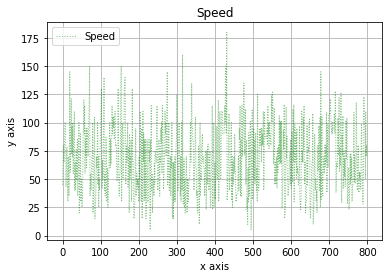

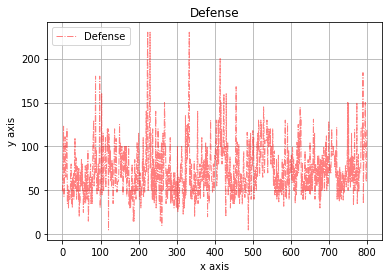

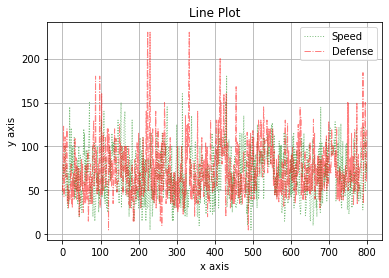

In [518]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line

f,ax0=plt.subplots()

data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')

ax0.legend(loc='upper left') 
ax0.set_xlabel('x axis')
ax0.set_ylabel('y axis')
ax0.set_title('Speed')

d,ax1=plt.subplots()
plt.figure(d)
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')

plt.legend(loc='upper left')  
plt.xlabel('x axis')              
plt.ylabel('y axis')
plt.title('Defense')           


plt.figure()
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()


Text(0.5, 1.0, 'Attack Defense Scatter Plot')

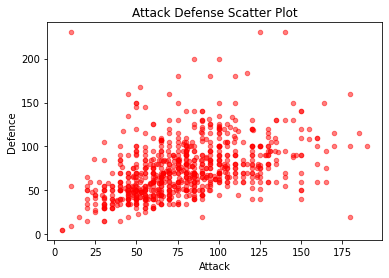

In [519]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

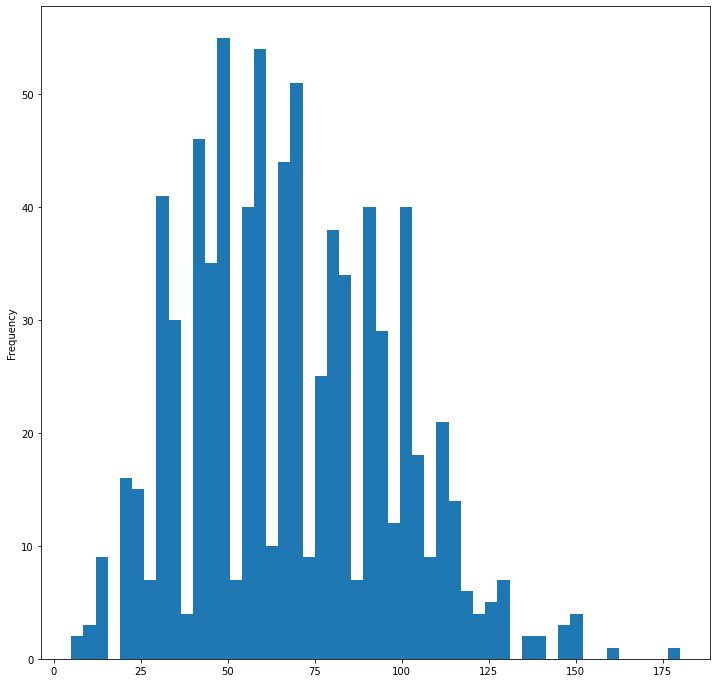

In [520]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [521]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

DICTIONARY

In [522]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

i=10
dic= {'arr':np.linspace(1,5,10),'arr2':np.arange(1,5,0.5),1:6,i:i}
i=40
print(dic.keys())
print(dic.values())



dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])
dict_keys(['arr', 'arr2', 1, 10])
dict_values([array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]), array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]), 6, 10])


In [523]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'

del dic[10]

print(dic,"\n",dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'arr': array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]), 'arr2': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]), 1: 6} 
 {'usa': 'vegas', 'france': 'paris'}
True
{}


In [524]:
# In order to run all code you need to take comment this line
# del dictionary         # delete entire dictionary     
# del dictionary ile dictionary i silebiliriz , sonrasında yazdırmak istersek hata verir 
print(dictionary)       # it gives error because dictionary is deleted

{}


PANDAS 

In [529]:
data = pd.read_csv('pokemon.csv') # csv yi yüklüyoruz 

In [542]:
#pandas kütüphanesi verileri okunabilir hale sokan iki veri yapısı sunar bunlar  *series ve *data frame dir 
#  series ler tek boyutludur(colon 1) dictionary lere benze fakat daha fazla control sunar 
#  data framesler 2 boyutludur series lerden oluşur 



series = data['Defense']        # data['Defense'] = series
print(type(series))
print(series,"\n\n")
data_frame = data[['Defense','Speed']]  # data[['Defense']] = data frame
print(type(data_frame))
print(data_frame)

<class 'pandas.core.series.Series'>
0       49
1       63
2       83
3      123
4       43
      ... 
795    150
796    110
797     60
798     60
799    120
Name: Defense, Length: 800, dtype: int64 


<class 'pandas.core.frame.DataFrame'>
     Defense  Speed
0         49     45
1         63     60
2         83     80
3        123     80
4         43     65
..       ...    ...
795      150     50
796      110    110
797       60     70
798       60     80
799      120     70

[800 rows x 2 columns]


In [543]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [571]:
# 1 - Filtering Pandas data frame
x = data['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [601]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100

data[np.logical_and(data['Defense']>200, data['Attack']>100 )]




,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [602]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.

# bu şekilde de yapılabilir 

# bitwise operatörün sağı ve solu için parentezleme yapılmalıdır çünki bitwise operatörler kıyas ifadelerine göre önceliğe sahiptir 
# '&' > '^' > '|' > ' in, not in, is, is not, <, <=, >, >=, !=, == ' 
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


WHILE and FOR LOOPS

In [609]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [624]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5

# adreslenmiş bir liste elde etmek için enumerate kullanılabilir 

indexed_list = enumerate(lis)

print(list(indexed_list))

for index, value in enumerate(lis):
    print(index," : ",value)
print('')   


# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for keya,value in dictionary.items():
    print(keya," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['Attack']][0:2].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  Attack    49
Name: 0, dtype: int64
1  :  Attack    62
Name: 1, dtype: int64
